In [1]:
using LinearAlgebra
using Plots

In [2]:
# Define function for Forward Euler
function forEuler(f, t_in, t_end, y_in, h)
   
    # Define time array
    t = range(t_in, t_end, step=h)
   
    # Define output array
    y = [y_in]
   
    # Loop over all time instants
    for i = 2:length(t)
        y_new = y[end]+ h * f(t[i-1], y[end])
        append!(y, y_new)
    end
   
    # Return time and output
    return (t, y)
end

forEuler (generic function with 1 method)

In [3]:
# Define function
y_acc(t) = @. exp(-t^2)
y(t, y) = @. -2 * t * y
 
# Define time limit and initial condition
t_in = 0.0
t_end = 10.0
h1 = 0.01
h2 = 0.3
y_in = 1.0

1.0

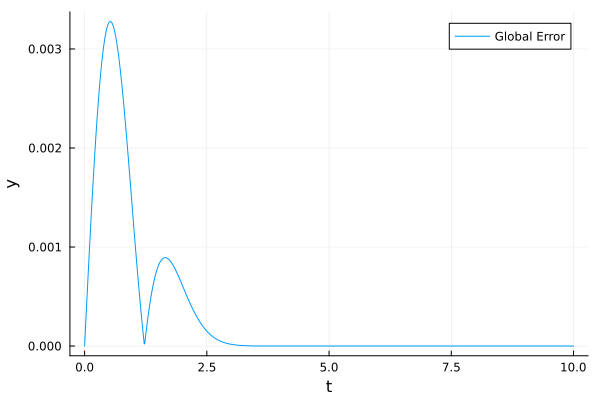

In [4]:
#Question 1
 
# Apply Forward Euler's method
(t, y_for) = forEuler(y, t_in, t_end, y_in, h1)
(t2, y_for2) = forEuler(y, t_in ,t_end, y_in, h2)
 
# Calulate Global Error
error = abs.(y_for .- y_acc.(t))

# Plot Error
plot(t, error, label="Global Error", xlabel="t", ylabel="y")

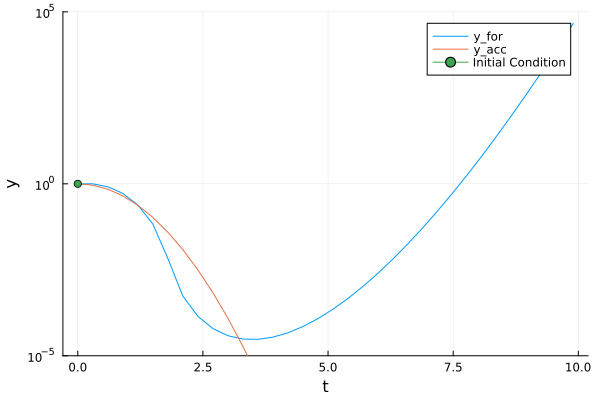

In [5]:
# Question 2

"""
From the plot the approximated solution (y_for) tends towards infinity as time increases
The exact solution (y_acc) tends towards zero
This shows the approximated solution (y_for) diverges from the exact solution (y_acc)
As a result, the solution is not stable for h=0.3
"""

plot(t2, abs.(y_for2), label="y_for", xlabel="t", ylabel="y", yaxis=:log, ylimits=(10^-5, 10^5))
plot!(t2, y_acc, label="y_acc")
plot!([t_in], [y_in], label="Initial Condition", markershape=:circle)

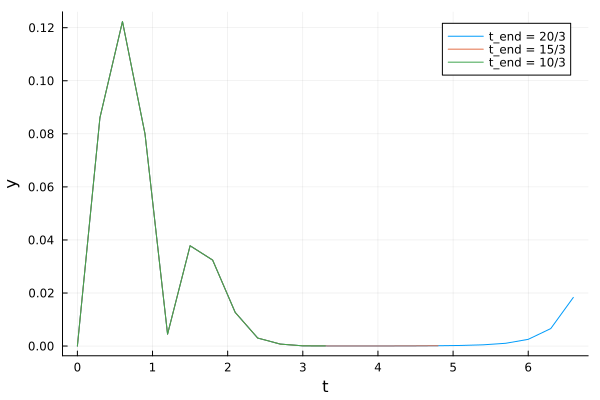

In [6]:
# Question 3

"""
Forward Euler's method is stable when |1 + h * λ| <= 1
y'(t) = A(t) * y(t), where A(t) = -2(t)
Since h=0.3, |1 - 0.6 * t| <= 1 will be stable
Solve the inequality to get 0 <= t <= 10/3
"""

(t1, y_for1) = forEuler(y, t_in, (10/3), y_in, h2)
(t2, y_for2) = forEuler(y, t_in, (15/3), y_in, h2)
(t3, y_for3) = forEuler(y, t_in, (20/3), y_in, h2)
 
globalError1 = abs.(y_for1 .- y_acc.(t1))
globalError2 = abs.(y_for2 .- y_acc.(t2))
globalError3 = abs.(y_for3 .- y_acc.(t3))

"""
From the plot it can be seen the solution converges to zero until t=10/3
After t=10/3 it can be seen the solution diverges and tends towards infinity
Additonal end times of t=15/3 and t=20/3 have been added to show the divergence on the plot
Thus 10/3 is the maximum value of t_end that makes the numerical solution stable when h=0.3
"""

plot(t3, globalError3, label="t_end = 20/3", xlabel="t", ylabel="y")
plot!(t2, globalError2, label="t_end = 15/3")
plot!(t1, globalError1, label="t_end = 10/3")